# **Logistic Regression**

## **Gradient Descent**

### **Problem with our approach so far:**

Ordinary Least Squares (OLS) method is trying to find **the optimal parameters that minimize the sum of squared errors**. In previous session we obtained a formula (closed-form solution) that allowed us to find the parameters: $\boldsymbol{\beta} =(\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$. Put values of given data points and you get solution in a single step. This method is a non-iterative approach for optimization. However, this method assumes:
  - Number of samples is larger than the number of independent variables.
  - Inverse of $X^TX$ exists.  

In addition, the inverse operation, $(X^TX)^{-1}$ is expensive to compute with time increasing very fast with the increase in number of data points. So for a large dataset with a large number of features, OLS can quickly become computationally infeasible.

### **Enter gradient descent:**

Let's start with an example. Suppose you are stuck in the middle of a hill and you want to get to the base of the hill but its all foggy and you can't see a thing. What would you do?

Well, one way is to begin by feeling the ground around you and take steps down in the steepest direction and hope you reach towards the bottom.

This is exactly what gradient descent method for minimization does.

### **Gradient Descent Algorithmn**

Consider a real-valued function  $y = f(\mathbf{x})$ for which you want to find value of $\mathbf{x}$ that produces the smallest possible output $y$. The gradient descent algorithm works in the following steps:

Step 1: Initialize the value of ${x}$ randomly

Step 2: Calculate the gradient of $f({x})$ with respect to ${x}$ ie.  $\frac{\partial\ f({x})}{\partial\ {x}}$

Step 3: Update ${x}$ as:

$${x} = {x} - \alpha \frac{\partial\ f({x})}{\partial\ {x}}$$

$\hspace{10cm}$ here, $\alpha$ is called the **learning rate**

Step 4: Repeat steps 1, 2 and 3 until the value of $f({x})$ converges to the minimum value.

### **Assignment 1**

Find the minimum value for $y = (x - 6)^2 + sin(3x)$ using gradient descent
- Plot the graph of the function and the current value (x, y) at every ten steps
- Try out different value for learning rate

In [7]:
# plot the graph of the function and the current value (x, y) at every ten steps
# try out different value for learning rate
import numpy as np
import matplotlib.pyplot as plt


array([  0.        ,  10.20408163,  20.40816327,  30.6122449 ,
        40.81632653,  51.02040816,  61.2244898 ,  71.42857143,
        81.63265306,  91.83673469, 102.04081633, 112.24489796,
       122.44897959, 132.65306122, 142.85714286, 153.06122449,
       163.26530612, 173.46938776, 183.67346939, 193.87755102,
       204.08163265, 214.28571429, 224.48979592, 234.69387755,
       244.89795918, 255.10204082, 265.30612245, 275.51020408,
       285.71428571, 295.91836735, 306.12244898, 316.32653061,
       326.53061224, 336.73469388, 346.93877551, 357.14285714,
       367.34693878, 377.55102041, 387.75510204, 397.95918367,
       408.16326531, 418.36734694, 428.57142857, 438.7755102 ,
       448.97959184, 459.18367347, 469.3877551 , 479.59183673,
       489.79591837, 500.        ])

Min value of X: 5.803401210742628


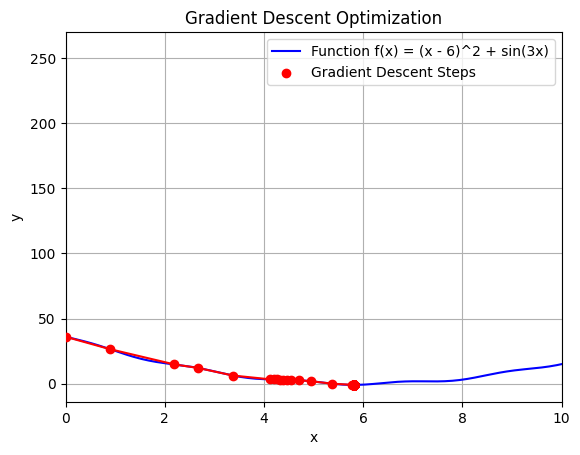

In [19]:


# Define the function y = (x - 6)^2 + sin(3x)
def f(x):
    return (x - 6)**2 + np.sin(3 * x)

# Define the derivative of the function with respect to x
def grad_f(x):
    return 2 * (x - 6) + 3 * np.cos(3 * x)

# Gradient Descent algorithm
def gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]
    y_values = [f(initial_x)]

    x = initial_x
    for i in range(num_iterations):
        gradient = grad_f(x)
        x = x - learning_rate * gradient
        x_values.append(x)
        y_values.append(f(x))

        # # Print the values of (x, y) every 10 steps
        # if i % 10 == 0:
        #     print(f"Step {i}, x = {x:.4f}, y = {f(x):.4f}")

    print(f"Min value of X: { x}")

    return x_values, y_values

# Plotting function
def plot_function_and_trajectory(x_values, y_values):
    # Generate a range of x values for plotting the function
    x_range = np.linspace(-10, 10, 400)
    y_range = f(x_range)

    # Create the plot
    plt.plot(x_range, y_range, label="Function f(x) = (x - 6)^2 + sin(3x)", color='blue')
    plt.scatter(x_values, y_values, color='red', label="Gradient Descent Steps", zorder=5)
    plt.plot(x_values, y_values, color='red', linestyle='-', zorder=4)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Optimization')
    plt.xlim(0, 10)
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
initial_x = 0.0  # Starting point for gradient descent
learning_rate = 0.1  # Learning rate
num_iterations = 1000  # Number of iterations for gradient descent

# Perform gradient descent
x_values, y_values = gradient_descent(initial_x, learning_rate, num_iterations)

# Plot the function and the trajectory
plot_function_and_trajectory(x_values, y_values)


### **Gradient Descent for Linear Regression**

In OLS, you minimized the sum of squared error (SSE). Here you will be minimizing the cost function. The cost function $J(.)$ is something that evaluates the quality of our result. For our linear regression case; let us take the cost function that is a constant multiple of SSE.

\begin{align*}
J(\beta_0, \beta_1, \beta_2, ... ,\beta_d) &= \frac{1}{2}\sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2 \\
&= \frac{1}{2}\sum_{i=1}^{n}((\beta_0x_{i0}+\beta_1x_{i1} +\beta_2x_{i2} + ... + \beta_dx_{id})-y_{i})^2
\end{align*}

*d = number of dimension, n = number of samples*

In matrix form:

$$J(\boldsymbol{\beta}) = \frac{1}{2}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2$$

*You want to find the parameters $\beta$ =
$\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
...   \\
\beta_d \\
\end{bmatrix} $
that minimizes the cost function $J$ using Gradient Descent.*

Partial derivative(gradient) of the cost function with respect to $\beta_1$,

\begin{align*}
\frac{\partial J}{\partial \beta_1} &= \frac{\partial}{\partial \beta_1} ( \frac{1}{2}\ \sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2)\\
&=\frac{1}{2}\ \sum_{i=1}^{n}\frac{\partial}{\partial \beta_1}(\hat{y_{i}}-{y_{i}})^2
\end{align*}

$\hspace{8cm}$Applying chain rule,

\begin{align*}
\hspace{8cm}&=\frac{1}{2}\ \sum_{i=1}^{n}\frac{\partial (\hat{y_{i}}-{y_{i}})^2}{\partial (\hat{y_{i}}-{y_{i}})} \times \frac{\partial (\hat{y_{i}}-{y_{i}})}{\partial \beta_1}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \times \frac{\partial (\beta_0x_{i0} + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_dx_{id}-y_i)}{\partial \beta_1}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \times x_{i1}\\
\therefore \frac{\partial J}{\partial \beta_1}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i1}
\end{align*}

Similarly,
\begin{align*}\frac{\partial J}{\partial \beta_0}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i0}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})\times 1\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})
\end{align*}


$$\frac{\partial J}{\partial \beta_2}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i2}$$

In general,

$$\frac{\partial J}{\partial \beta_d}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{id}$$


We can write this generalized expression in matrix form to calculate the gradients wrt. all the parameters simultaneously as:

$$\frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}
= \begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1}\\
\frac{\partial J}{\partial \beta_2}\\
... \\
\frac{\partial J}{\partial \beta_d}
\end{bmatrix}
= \mathbf{X^T}(\mathbf{\hat{y}-y})$$

### Assignment 2

Find using gradient descent the best fit line for data points $(x1, x2, x3, y) = x1 + 10x2 + 0.005x3 + noise$

*Data Creation:*
 - create 500 sample points
 - x1 using normal distribution (mean = 2, std = 2.5)
 - x2 between 0 and 1 (uniform distribution)
 - x3 between 10,000 and 20,000 (uniform distribution)
 - noise = random error sampled from normal distribution; mean =0, std = 2

*Gradient Descent:*
 - Take random value of your choice for coefficients to start at
 - Stop at 100 iterations
 - Plot on graph how SSE changes with increase in iteration


In [ ]:
## gradient descent for multiple linear regression

## **Feature scaling**

Lets take a function $y = 2x_1 + 100x_2 + 5$; what does this tell us?
- Increasing x1 by 1 unit increases y by two units and vice-versa
- Increasing x2 by two units decreases y by hundred units and vice-versa
- Feature $x_2$ is more important than $x_1$

But what if we scale each of the values in data points of say feature $x_2$ by 100 times i.e. if $x_2$_new = 100$x_2$ then what will be our new linear regressor? $y = 2x_1 + x_2$_new $+ 5$

So, we cannot judge relative importance of values using just the coefficients.

Similarly observe the gradient
$$\frac{\partial J}{\partial \beta_d}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{id}$$

Here, the gradient is greater if we have larger values for feature. So, if there are multiple features and multiple ranges for each, then when taking step using gradient descent we may overshoot or undershoot along some feature axis which can lead to slow convergence of the model.

So, we perform feature scaling to scale values of all features within similar range.



**There are two important feature scaling methods:**

### **Min-Max Scaling:**

Min-Max scaling scales the features to have values between 0 and 1.

For each value of $i^{th}$ feature, $x_i$, min-max scaling scales the value as:

$$
x_i = \frac{x_i - \text{min}(x_i)}{\text{max}(x_i) - \text{min}(x_i)}
$$

where,

$\text{min}(x_i)$ = minimum of $i^{th}$ feature

$\text{max}(x_i)$ = maximum of $i^{th}$ feature

Min-max scaling can be used when you don't have any assumptions about the distribution of data. Algorithms such as decision tree, random forest, Naive Bayes, etc do not assume the data to be normally distributed. However, min-max scaling is highly affected by outliers because of its use of minimum and maximum values. So we prefer standardization over min-max scaling in general.

### **Standardization:**

Standardization scales the features to have values with 0 mean and unit variance.

For each value of $i^{th}$ feature, $x_i$, standardization scales the value as:

$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$

where,

$\mu_i$ = mean of $i^{th}$ feature

$\sigma_i$ = standard deviation of $i^{th}$ feature

Standardization is used when you want the data to be normally distributed. Many machine learning algorithms like linear regression, logistic regression and principal component analysis assume the data to be normally distributed. Also, standardization is relatvely less prone to outliers when compared to min-max scaling.

### Assignment 3

Using the same data we generated in assignment 2, perform appropriate feature scaling and then fit a regression using gradient descent:
- Use same initial value for coefficients you used in assignment 2 but scale appropriately. For example if beta1 was 1 and now you scaled x1 using min-max to be about 4 times as large then use beta1 four times as smaller. *(This is just so that we can compare two scenarios more fairly)*.
- Stop at 100 iterations
- Plot on graph how SSE changes with increase in iteration

In [ ]:
##standardization

## **Classification**



Till now we studied and solved problems where we wanted to predict continious values but what if our problem was different.

For instance given the marks of a student in maths, physics, chemistry will he pass this upcoming assesment or not? How likely?

Or given the amount of cholestrol and sugar in blood, is this patient likely to have heart attack in next 5 years? How likely?

Note here we have two discre set of output values either 'Yes' or 'No'; numerically lets say 1 or 0. However there is some pattern; For instance the higher the marks the more likely to pass the upcomming assesment and the higher the blood gluose levels the more likely its is to have heart attack. Well logistic regression soles this and we will be looking at it in more detail now.

## **Logistic regression**

Recall the equation of simple linear regression.

$$\hat{y} = \beta_0 + \beta_1\ x$$

where  $\beta_0$ and $\beta_1$ are the regression coefficients and $x$ is the input feature.

In *logistic regression*, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$


where $z$ is any input real number. So our regression model becomes: $p(x) = \frac 1 {(1+ e^{-(\beta_0 + \beta_1 x)})}$

### Assignment 4:

- First plot the sigmoid function
 - with a input z (taken from equally spaced points within some range)

 ---

- Next plot the logistic regression for dirrerent values of parameter coefficients
 - Take a value for $\beta_0$ and $\beta_1$
 - Taking equally spaced values $x$ from certain range find $p(x)$ as given above
 - Change value of $\beta_0$ and $\beta_1$ and note how the output changes

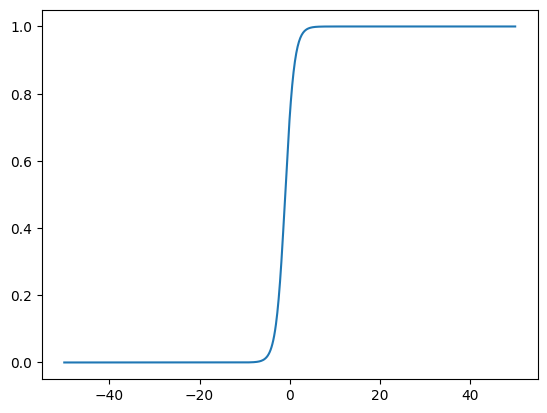

In [39]:
def fun_y(a, b, x):
  return (a+b*x)

def fun_sigmoid():
  x_value= np.linspace(-50, 50, 1000)
  y_value = []
  for x in x_value:
      y = fun_y(1, 1, x)
      y_value.append(1/(1+np.exp(-y)))
  return x_value, y_value


x, y = fun_sigmoid()

plt.plot(x, y)

**Interpretation of output of logistic regresssion:** *The output of logistic regression, $p(x)$ gives us the probability of the sample belonging to class 1, and $1-p(x)$ gives us the probability of it belonging to class 0.*

### Assignment 5:


- Lets generate a synthetic data for getting scholarship based on GRE score at a hypothetical university:
- A student is likely to get scholarship if his/her GRE score is above 310 and
not if less
---
- Generate the dataset:
 - Generate a series of 100 random values (feature $x$) for GRE
 - The associated output $y = 1 \ if \ x <= 310 \ and \ y = 0 \ if \ x > 310$
 - Randomly invert the $y$ values of few samples (say 5) to simulate real world data
 - Plot this values

In [53]:
greScore= np.random.randint(260, 340, size= 200)
outputY = [1 if score<=310 else 0  for score in greScore]

for i in range(len(outputY)):
  test_value = np.random.random(0,1)
  if test_value <= 0.05:
    outputY[i] = 1
  else:
    outputY[i]=0

TypeError: random() takes at most 1 positional argument (2 given)

### Cost function for logistic function:

The logistic regression model, $ h_w(x) $, can be used to make a prediction as it estimates the probabilities.

$$ \mathcal{\hat{P}} = h_w(x) = \sigma(w^Tx) $$

 We now need to choose the parameters $w$ such that, the model $h_w(x)$ estimates high probabilities for positive class $(y=1)$ and low probabilities for negative class $(y=0)$. The following cost function captures this behavior of $h_w(x)$.

<a name='eq1'></a>
$$
\text{Cost}(h_w(x),y) =
\begin{cases}
  -\log (h_w(x)) & \text{if} & y = 1 \\
  -\log (1-h_w(x)) & \text{if} & y = 0
\end{cases}
$$

This means the model is bad when it gives opposing output to dataset and by larger and larger margin for correspondingly large opposing output. Theoretically if its output is zero when in reality it should have been 1 then it has infinite cost!!

*Symbol alert!!: models are often represented in literatures by "$h()$" and beta parameters as weight "$w$"*

The cost function can be written in a single line as:
<a name="eq2"></a>
$$ \text{Cost}(\hat{y}, y) = J(\hat{y}) = -y\log(\hat{y}) - (1-y)\log(1-\hat{y}) $$

$\hspace{8cm} where \ \hat{y} =  \beta_0 + \beta_1 * x; \ (x, y) \ is \ the \ data \ point$

To take derivative with respect to $\beta_0$ and $\beta_1$ we apply chain rule:
$ \frac{\partial J}{\partial \beta} =  \frac{\partial J}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial \beta} $

$\frac{\partial \hat{y}}{\partial \beta_0} = 1$

$\frac{\partial \hat{y}}{\partial \beta_1} = x$

$\frac{\partial J}{\partial \hat{y}} = \hat{y} * (1- \hat{y})$

The above is cost for single data point. For our dataset we sum the errors for all data points. Thus our gradient becomes:

$\hspace{8cm} \frac{\partial J}{\partial \beta_0} = \sum_{i=1}^{n} (\hat{y_i} * (1- \hat{y_i}) * x_i)$

$\hspace{8cm} where \ \hat{y_i} = \sigma(\beta_0 + \beta_1 * x_i)$

Similar holds for multivariable case.


<ipython-input-57-2c4261b53d55>:5: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


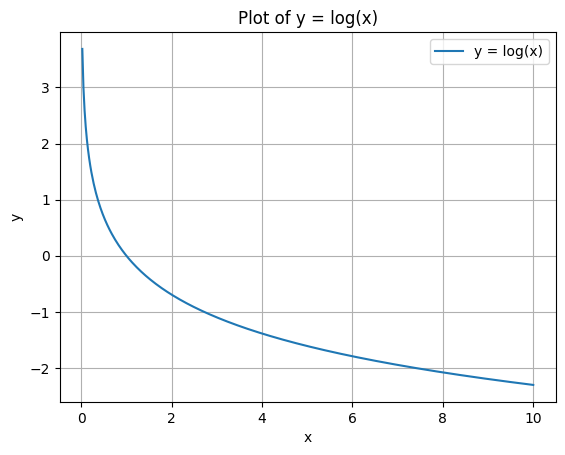

In [57]:
# Define the range for x (positive values only, as log(x) is undefined for x <= 0)
x = np.linspace(0, 10, 400)  # Values between 0.1 and 10, avoiding zero

# Calculate y = log(x) using numpy's log function
y = -np.log(x)

# Plot the function
plt.plot(x, y, label="y = log(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = log(x)")
plt.grid(True)
plt.legend()
plt.show()

### Assignment 6:

- Fit logistic regression to data created in assignment 5 and plot the resulting logistic function
- Predict output for GRE score 320 (take threshold p = 0.5)
- Confirm the prediction using sklearn library


*Note:- We may not always take p=0.5 to be threshold depending on application for example if required high confidence for prediction of one class rather than other then we may take other.*